<a href="https://colab.research.google.com/github/hc417tw/118S_Course/blob/main/Extra_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

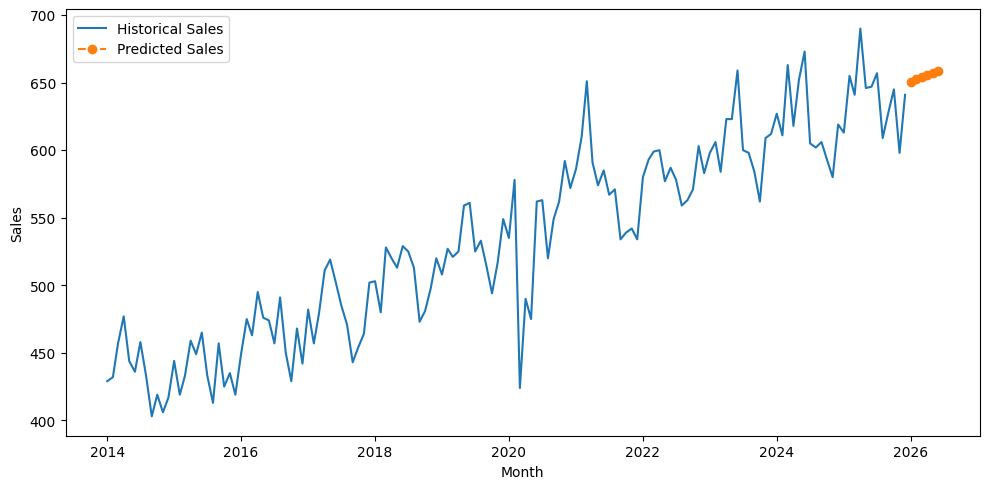

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Load dataset from ChatGPT as the reqiurment told us to have sample dataset from Chatgpt.
# Prompt: "Please help me generate a CSV file contain only months and sales for housing."
df = pd.read_csv('/content/housing_monthly_sales.csv')
# Since the data from ChatGPT is year-month (ex: 2024-12), I need to convert month to datetime, othervise would create value error
df["month"] = pd.to_datetime(df["month"], format="%Y-%m")
df = df.sort_values("month").reset_index(drop=True)
df["tm"] = np.arange(len(df))
X = df[["tm"]]
y = df["sales"]
model = LinearRegression()
model.fit(X, y)
# Predict for the next 6 months
future_t = pd.DataFrame({"tm": range(df["tm"].max() + 1, df["tm"].max() + 7)})
predictions = model.predict(future_t)
# Create labels for the next 6 month
future_months = pd.date_range(df["month"].max() + pd.offsets.MonthBegin(1), periods=6, freq="MS")
# Generate Plot for result
plt.figure(figsize=(10,5))
plt.plot(df["month"], y, label="Historical Sales")
plt.plot(future_months, predictions, label="Predicted Sales", linestyle="--", marker="o")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()
